In [68]:
import numpy as np
from matplotlib import pyplot as plt

In [57]:
def QR(A):
    n = A.shape[0]

    Q = np.zeros_like(A)
    R = np.zeros_like(A)

    Q[:, 0] = A[:, 0] / np.linalg.norm(A[:, 0])
    R[0, 0] = np.inner(Q[:, 0], A[:, 0])
    for k in range(1, n):
        Q[:, k] = A[:, k]
        for i in range(0, k):
            R[i, k] = np.inner(Q[:, i], A[:, k])
            Q[:, k] -= np.inner(Q[:, i], A[:, k]) * Q[:, i]

        Q[:, k] = Q[:, k] / np.linalg.norm(Q[:, k])
        R[k, k] = np.inner(Q[:, k], A[:, k])

    return Q, R

# matrix = np.array([[8, 8, 3], [4, 5, 6], [7, 8, 9]], dtype=np.float64)
# Q, R = QR(matrix)
# print(Q)
# print(R)

IndexError: index 3 is out of bounds for axis 1 with size 3

In [58]:
# matrix = np.array([[8, 8, 3], [4, 5, 6], [7, 8, 9]], dtype=np.float64)
#
# q, r = np.linalg.qr(matrix)
# print(q)
# print(r)

[[-0.63644583  0.50134516  0.58616529]
 [-0.31822291 -0.64946986  0.20996966]
 [-0.5568901  -0.46146543 -0.20996966]
 [-0.15911146  0.12533629 -0.27995954]
 [-0.39777864  0.31334072 -0.69989885]]
[[-12.56980509 -13.4449181  -11.13780198]
 [  0.          -1.11093529  -4.72859636]
 [  0.           0.          -2.93082643]]


In [11]:
a = np.array([1,2,3])
b = np.array([0,1,1])
np.inner(a, b)

5

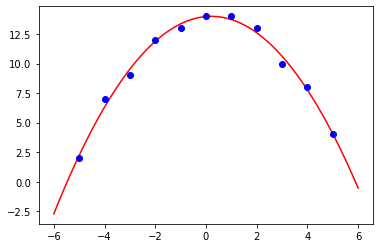

In [78]:
def fit(points):
    A = np.array([[1, x, x ** 2] for x, _ in points], dtype=np.float64)
    b = np.array([[y] for _, y in points])

    Q, R = np.linalg.qr(A)
    R_inv = np.linalg.inv(R)
    x = R_inv @ Q.T @ b

    return lambda y: x[0, 0] + x[1, 0] * y + x[2, 0] * y ** 2


p = [(-5, 2), (-4, 7), (-3, 9), (-2, 12), (-1, 13), (0, 14), (1, 14), (2, 13), (3, 10), (4, 8), (5, 4)]
f = fit(p)

x_linspace = np.linspace(-6, 6, 100)
plt.plot(x_linspace, f(x_linspace), color='red')
plt.plot([x for x, _ in p], [y for _, y in p], 'bo')
plt.show()